### Unzip the file

In [ ]:
# unzip file
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
replace vehicles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### import libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
import lightgbm
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')


### Loading dataset

In [2]:
df = pd.read_csv('vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
df.shape

(426880, 26)

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

The dataset consists of 426880 rows and 26 columns.

In [5]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [6]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


### Removing unwanted variables

In [7]:
df = df.drop(['id','url','region','region_url','VIN','image_url','description','county','posting_date','state','model'],axis=1)
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Split the dataset

In [8]:
X = df.drop('price',axis=1)
Y = df.price
# Split the data into train and test dataset
# train is 80% and test is  20%
X_train, X_t, y_train, y_t = train_test_split(X,Y,test_size=0.8,random_state=42)

print(f'X_train shape is {X_train.shape}')
print(f'X_t shape is {X_t.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_t shape is {y_t.shape}')

X_train shape is (85376, 14)
X_t shape is (341504, 14)
y_train shape is (85376,)
y_t shape is (341504,)


In [9]:
X = X_t 
Y = y_t 
# Split the data into test and valid dataset
# train is 10% and test is  10%
X_test, X_valid, y_test, y_valid = train_test_split(X,Y,test_size=0.5,random_state=42)

print(f'X_test shape is {X_test.shape}')
print(f'X_valid shape is {X_valid.shape}')
print(f'y_test shape is {y_test.shape}')
print(f'y_valid shape is {y_valid.shape}')

X_test shape is (170752, 14)
X_valid shape is (170752, 14)
y_test shape is (170752,)
y_valid shape is (170752,)


### Cleaning on the train dataset

In [10]:
train_df = X_train
train_df['price'] = y_train
train_df = train_df.reset_index(drop=True)
train_df.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,2018.0,honda,NaN,6 cylinders,gas,21353.0,clean,automatic,fwd,NaN,van,custom,27.703573,-97.345045,29901
1,2013.0,toyota,excellent,4 cylinders,hybrid,115603.0,NaN,automatic,NaN,NaN,other,NaN,38.624043,-121.401842,10495
2,2017.0,cadillac,good,6 cylinders,gas,33333.0,clean,other,fwd,NaN,other,silver,29.450000,-98.500000,28590
3,2010.0,chevrolet,NaN,NaN,gas,139705.0,clean,automatic,NaN,NaN,NaN,NaN,43.182400,-84.112200,5995
4,2011.0,toyota,NaN,NaN,other,161027.0,clean,automatic,4wd,NaN,truck,NaN,39.391700,-94.559200,0


### Missing values

In [11]:
# check missing values are present or not
train_df.isna().sum()/len(train_df) * 100

year             0.279938
manufacturer     4.236554
condition       40.788981
cylinders       41.537434
fuel             0.646552
odometer         1.013165
title_status     1.936141
transmission     0.586816
drive           30.707693
size            71.835176
type            21.682909
paint_color     30.602277
lat              1.519162
long             1.519162
price            0.000000
dtype: float64

We can observed that missing values are present in the data. We are going to remove variables which having missingt values more than 70% of data.And also we would drop missing values in the dataset.

In [12]:
train_df = train_df.drop(['size'],axis=1)
train_df.shape

(85376, 14)

In [13]:
# Removing missing values
train_df = train_df.dropna()
train_df.shape

(23283, 14)

In [14]:
train_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23283 entries, 2 to 85375
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          23283 non-null  float64
 1   manufacturer  23283 non-null  object 
 2   condition     23283 non-null  object 
 3   cylinders     23283 non-null  object 
 4   fuel          23283 non-null  object 
 5   odometer      23283 non-null  float64
 6   title_status  23283 non-null  object 
 7   transmission  23283 non-null  object 
 8   drive         23283 non-null  object 
 9   type          23283 non-null  object 
 10  paint_color   23283 non-null  object 
 11  lat           23283 non-null  float64
 12  long          23283 non-null  float64
 13  price         23283 non-null  int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 13.6 MB


In [15]:
train_df = train_df.reset_index(drop=True)
train_df.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,lat,long,price
0,2017.0,cadillac,good,6 cylinders,gas,33333.0,clean,other,fwd,other,silver,29.450000,-98.500000,28590
1,2018.0,acura,good,6 cylinders,gas,38619.0,clean,other,fwd,other,blue,42.410000,-70.990000,25990
2,2006.0,nissan,good,6 cylinders,gas,160940.0,clean,automatic,rwd,SUV,grey,43.169800,-77.600700,5500
3,2014.0,honda,excellent,6 cylinders,gas,143895.0,clean,automatic,rwd,SUV,black,27.527275,-82.572917,11395
4,2008.0,toyota,excellent,6 cylinders,gas,88706.0,clean,automatic,fwd,SUV,grey,21.331156,-157.884323,16900


In [16]:
train_df.shape

(23283, 14)

### Data visualization

### Histogram for Price


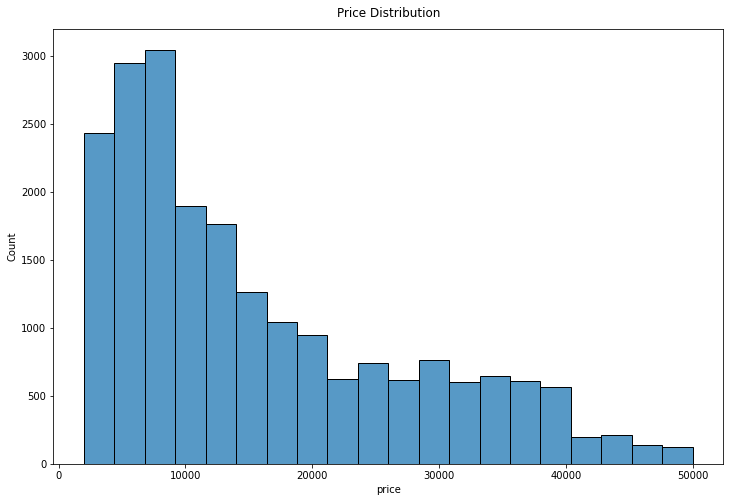

In [17]:
train_df_prc =train_df[(train_df.price >=2000) & (train_df.price <=50000)]
# Then plot the distriution 
f, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Price Distribution', pad=12)
sns.histplot(train_df_prc, x="price", stat='count', bins=20)

### Distribution plot for odometer

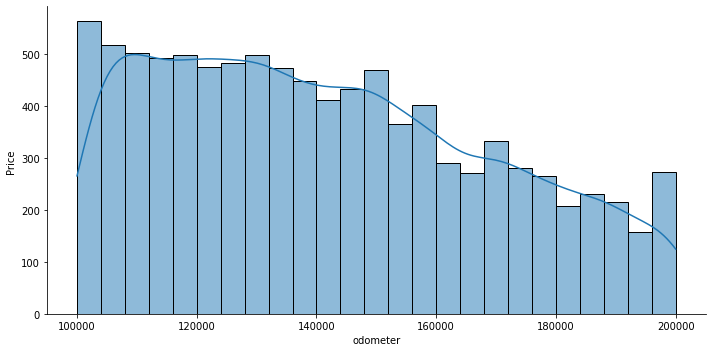

In [18]:
train_df_prc = train_df[(train_df.price >=2000) & (train_df.price <=50000)]
train_df_odo = train_df_prc[(train_df_prc.odometer >100000) & (train_df_prc.odometer <=200000)]
sns.displot(data=train_df_odo, x="odometer", aspect=2, height=5, kde=True)
plt.ylabel("Price ", fontsize=10);

### Price Vs Year

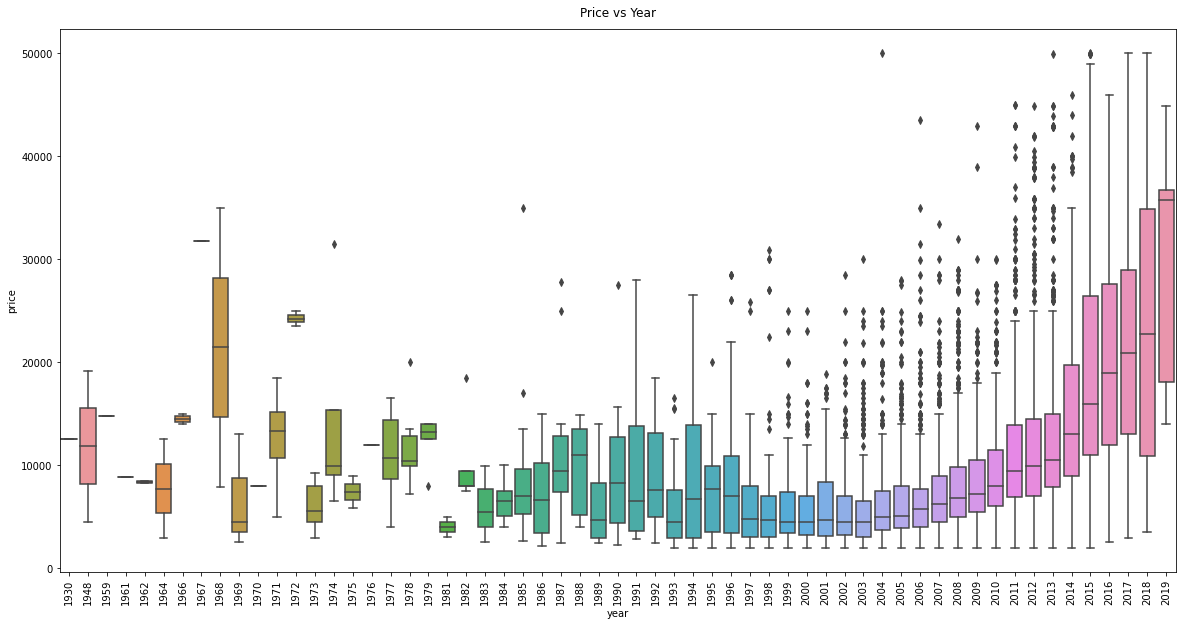

In [19]:
f, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Price vs Year', pad=12)
fig = sns.boxplot(x=train_df_odo.year.astype(int), y='price', data=train_df_odo)
plt.xticks(rotation=90);

We can observ
ed that car prices rising steadily from the year 2000 onwards.

### Condition vs Price

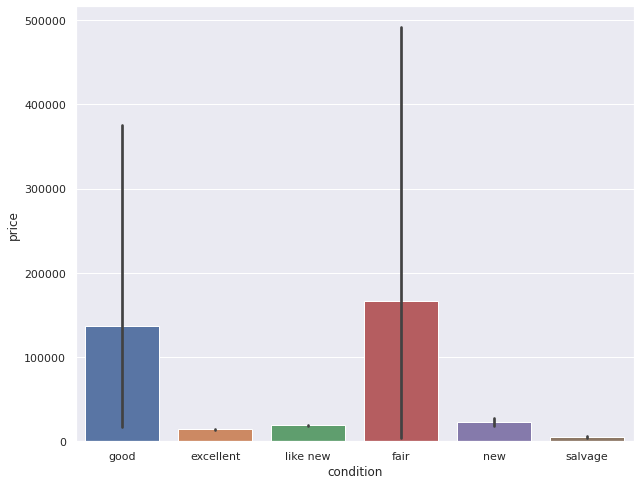

In [20]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x='condition',y='price',data=train_df)

We can observed that used car prices higher for cars in like new, 
good and fair condition.

### Type Vs Price

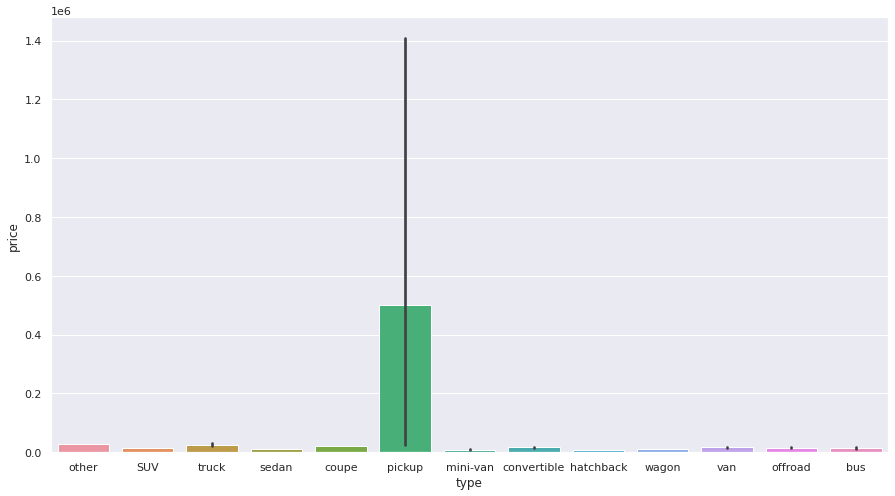

In [21]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='type',y='price',data=train_df)

We can observed that, pickup cars are costlier than other cars.

Answer following questions

1. How price of cars is effected by the fuel

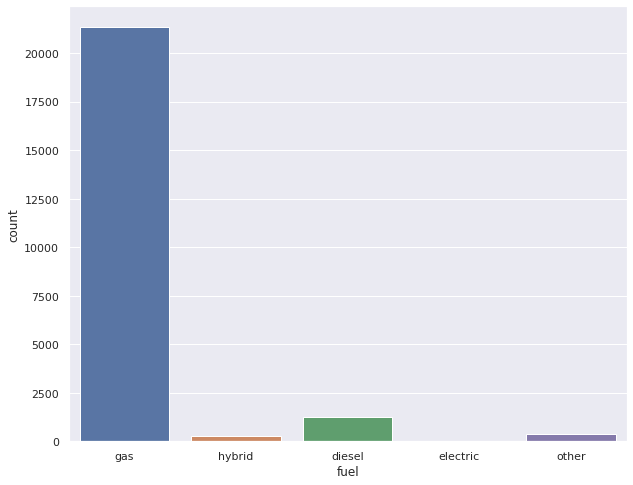

In [22]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x='fuel', data=train_df)

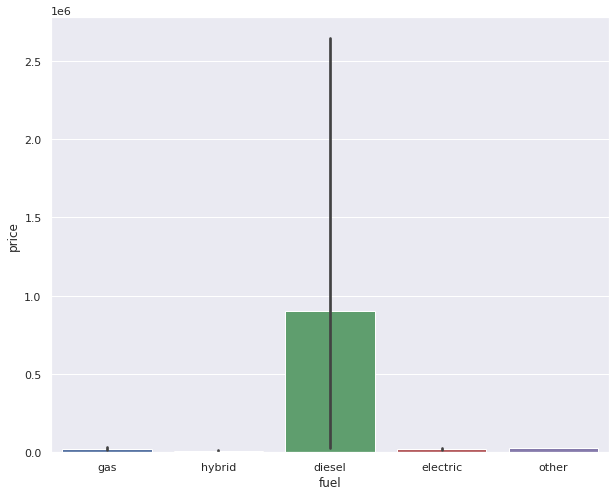

In [23]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x='fuel',y='price',data=train_df)

From the above plots, we observed that cars which use diesel fuel is costlier than other cars which use like gas, electric,other and hybrid. And also most of the cars are used gas fuel.

2. How price is related to different kinds of manufacturing

In [24]:
train_df.manufacturer.unique()

array(['cadillac', 'acura', 'nissan', 'honda', 'toyota', 'audi', 'ford',
       'subaru', 'pontiac', 'jeep', 'ram', 'chevrolet', 'hyundai', 'gmc',
       'kia', 'mercedes-benz', 'saturn', 'dodge', 'mercury', 'lincoln',
       'bmw', 'porsche', 'volvo', 'infiniti', 'chrysler', 'buick',
       'volkswagen', 'mini', 'mazda', 'rover', 'aston-martin', 'lexus',
       'mitsubishi', 'land rover', 'alfa-romeo', 'fiat', 'jaguar',
       'harley-davidson', 'tesla', 'datsun', 'ferrari'], dtype=object)

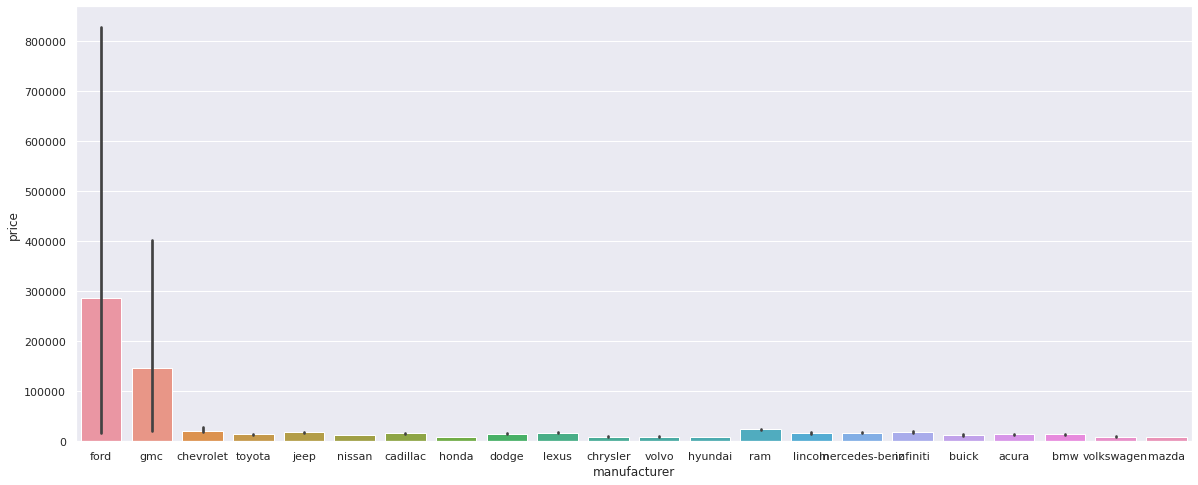

In [25]:
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x='manufacturer',y='price',data=train_df,order=['ford', 'gmc', 'chevrolet', 'toyota', 'jeep', 'nissan', 'cadillac',
       'honda', 'dodge', 'lexus', 'chrysler', 'volvo', 'hyundai', 'ram',
       'lincoln', 'mercedes-benz', 'infiniti', 'buick', 'acura', 'bmw',
       'volkswagen', 'mazda'])

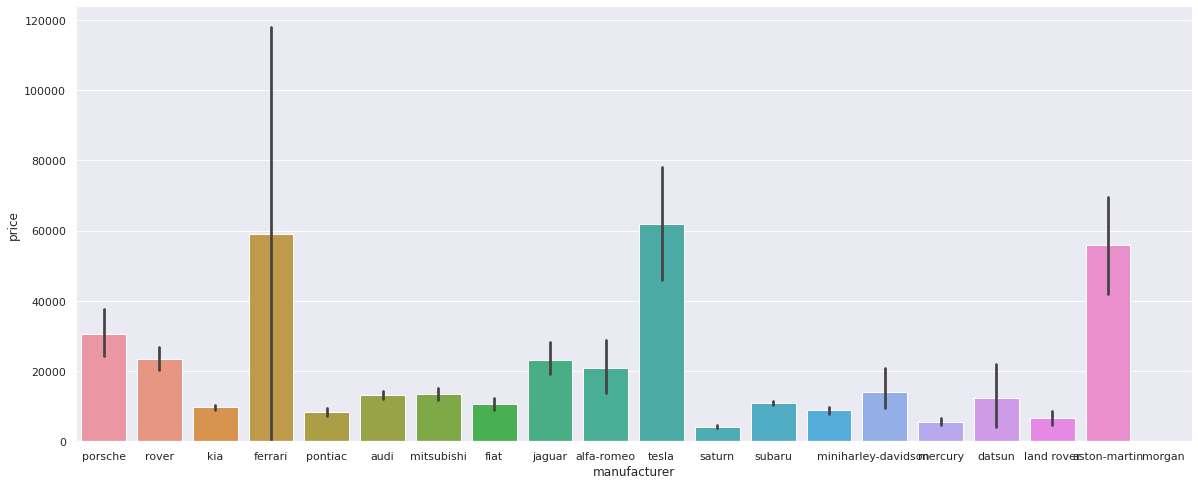

In [26]:
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x='manufacturer',y='price',data=train_df,order=['porsche', 'rover', 'kia', 'ferrari',
       'pontiac', 'audi', 'mitsubishi', 'fiat', 'jaguar', 'alfa-romeo',
       'tesla', 'saturn', 'subaru', 'mini', 'harley-davidson', 'mercury',
       'datsun', 'land rover', 'aston-martin', 'morgan'])

From the above above plots, we can conclude that buick cars are costlier than other manufactures and followed by ford and ferrari.

3. what is the common color for used car

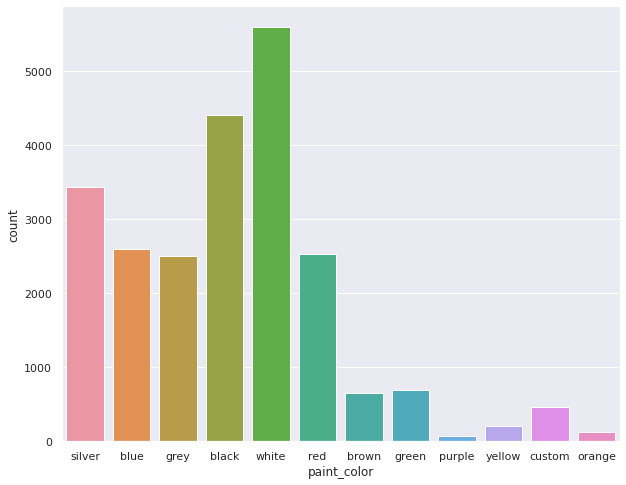

In [27]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x='paint_color', data=train_df)

From the above plot, we can conclude that common color for used car is white and followed by black.

4. How can we predict used car price

Encoding the train categorical variables

In [28]:
# Get dummy variables
train_df_encoded = pd.get_dummies(train_df,columns=['condition','cylinders','manufacturer','fuel','title_status','transmission','drive','type','paint_color'])
# reset index
train_df_encoded = train_df_encoded.reset_index(drop=True)
train_df_encoded.head()

,year,odometer,lat,long,price,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_10 cylinders,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,...,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,2017.0,33333.0,29.450000,-98.500000,28590,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2018.0,38619.0,42.410000,-70.990000,25990,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2006.0,160940.0,43.169800,-77.600700,5500,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2014.0,143895.0,27.527275,-82.572917,11395,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2008.0,88706.0,21.331156,-157.884323,16900,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [29]:
train_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23283 entries, 0 to 23282
Columns: 102 entries, year to paint_color_yellow
dtypes: float64(4), int64(1), uint8(97)
memory usage: 3.0 MB


### Train Correlation matrix

Plot correlation matrix using heatmap to check how the features are correlated.

In [30]:
# Corrlation between the variables
train_df_encoded.corr()

,year,odometer,lat,long,price,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_10 cylinders,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,...,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
year,1.000000,-0.127658,-0.005931,0.046156,-0.007147,0.045822,-0.205968,-0.024918,0.087331,0.004934,-0.030078,0.011942,-0.016299,-0.011203,0.101808,-0.017982,0.074415,-0.174545,-0.033596,0.012121,-0.015685,-0.002821,0.014545,0.010153,-0.017767,-0.030124,-0.046737,0.000385,-0.048078,0.009547,-0.004461,-0.003874,-0.050851,0.028975,-0.014314,-0.003475,0.044295,0.044304,-0.017332,0.018392,...,-0.047686,0.026864,0.071284,-0.036075,0.029754,-0.103066,-0.029695,0.054944,0.007362,0.002611,-0.277586,0.226473,0.133542,0.095704,-0.261737,0.072266,-0.033539,-0.180856,-0.117033,0.019223,0.005282,-0.068132,0.057404,0.022970,0.038250,-0.033230,0.036005,0.020826,0.070642,-0.054250,-0.048381,-0.082903,-0.126693,0.040800,-0.048094,-0.044013,-0.058614,0.032920,0.087726,-0.074767
odometer,-0.127658,1.000000,-0.004826,-0.005551,0.001781,-0.007041,0.099586,-0.005081,-0.035791,-0.018482,0.014165,-0.002203,0.000597,-0.010466,-0.008248,0.012811,-0.008858,0.017133,-0.007499,0.003219,-0.009394,-0.006277,-0.005666,-0.010573,-0.007865,-0.008269,-0.010893,-0.004147,-0.001421,-0.018228,-0.006908,-0.009913,0.016734,0.011536,0.002577,0.024555,0.008096,-0.016907,-0.013679,-0.019726,...,-0.030318,0.002189,-0.038228,0.022875,-0.009866,0.004392,0.001089,-0.024516,-0.002471,0.092922,0.028365,-0.138313,0.009665,0.006374,-0.018328,0.031042,0.001503,-0.023494,-0.031998,-0.002494,0.020944,-0.000214,-0.049627,-0.021139,-0.013789,0.049651,0.000079,0.002917,-0.024935,0.012779,0.008220,0.002664,0.016954,0.008841,-0.009163,0.005155,-0.004159,0.014446,-0.010091,-0.007924
lat,-0.005931,-0.004826,1.000000,-0.028500,0.002799,-0.006771,0.016385,0.025124,-0.037756,0.000368,-0.003284,-0.034444,0.007722,-0.003514,0.043028,-0.004979,-0.015247,-0.020814,0.004560,-0.011019,-0.000747,-0.015880,0.022958,-0.024758,0.034534,-0.010043,0.028922,0.005049,-0.003283,-0.014478,0.005984,-0.007725,0.012765,-0.002009,0.004308,-0.002477,0.003036,-0.024000,-0.015032,0.004511,...,-0.006448,-0.010132,-0.012179,-0.012313,0.022433,0.002758,0.006638,0.009075,-0.007714,0.053929,0.018838,-0.082238,0.176066,-0.049269,-0.149663,0.054300,-0.000059,-0.017896,-0.043192,0.013615,-0.001279,-0.020534,-0.037721,-0.017271,-0.009323,0.003653,-0.002826,0.033361,0.009528,0.024187,0.016130,-0.014175,0.024243,0.013083,-0.007428,0.010716,0.026570,-0.007757,-0.058580,-0.007928
long,0.046156,-0.005551,-0.028500,1.000000,-0.011901,-0.054368,-0.012027,0.074754,-0.020596,-0.006197,-0.013634,0.024729,-0.002964,0.007072,-0.050314,-0.001753,0.025743,0.020986,-0.017572,-0.011923,0.000050,0.009774,0.001069,-0.008322,0.005711,0.005027,0.013608,0.011254,-0.014652,-0.002455,-0.004569,-0.013561,0.019061,

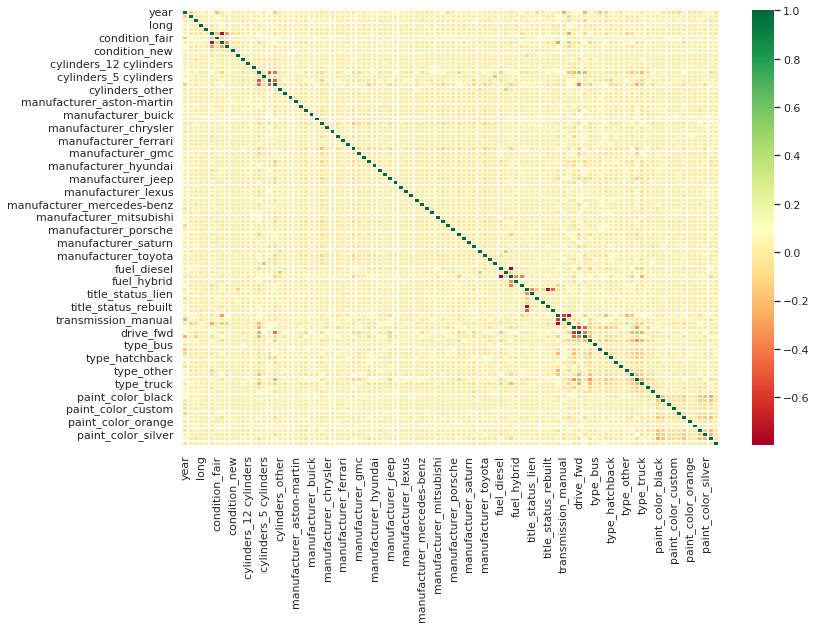

In [31]:
# Correlation plot
plt.figure(figsize = (12,8))
train_df_corr = train_df_encoded.corr()
sns.heatmap(train_df_corr,fmt = "", cmap = "RdYlGn", linewidth = 0.30)
plt.show()

Normalizing the train data

In [32]:
## MinMax scaler
scaler = MinMaxScaler()

scaler.fit(train_df_encoded.drop('price',axis=1))

train_df_scaled = scaler.transform(train_df_encoded.drop('price',axis=1))

train_df_scaled

array([[0.95      , 0.0033333 , 0.29812429, ..., 1.        , 0.        ,
        0.        ],
       [0.96      , 0.0038619 , 0.47039366, ..., 0.        , 0.        ,
        0.        ],
       [0.84      , 0.016094  , 0.48049321, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9       , 0.0065    , 0.26679812, ..., 0.        , 0.        ,
        0.        ],
       [0.91      , 0.01392   , 0.37449306, ..., 1.        , 0.        ,
        0.        ],
       [0.89      , 0.0218666 , 0.3559063 , ..., 0.        , 0.        ,
        0.        ]])

In [33]:
train_df_encoded.shape

(23283, 102)

### Cleaning on the validation dataset

In [34]:
valid_df = X_valid
valid_df['price'] = y_valid
valid_df = valid_df.reset_index(drop=True)
valid_df.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,2008.0,nissan,excellent,4 cylinders,gas,146000.0,clean,automatic,fwd,compact,sedan,white,40.433200,-74.199600,3800
1,2018.0,honda,NaN,NaN,gas,54723.0,clean,automatic,4wd,NaN,SUV,NaN,38.570730,-77.318480,19999
2,2017.0,chevrolet,NaN,NaN,gas,118312.0,clean,automatic,NaN,NaN,NaN,NaN,44.538579,-88.070989,13984
3,2012.0,chrysler,excellent,8 cylinders,gas,100900.0,clean,automatic,rwd,NaN,sedan,black,40.137859,-74.820807,11995
4,2014.0,chrysler,NaN,6 cylinders,gas,83025.0,NaN,automatic,fwd,NaN,van,NaN,43.176636,-88.023648,13998


In [35]:

valid_df.shape

(170752, 15)

In [36]:
# check missing values are present or not
valid_df.isna().sum()/len(valid_df) * 100

year             0.272325
manufacturer     4.185603
condition       40.804207
cylinders       41.642850
fuel             0.718000
odometer         1.053575
title_status     1.925600
transmission     0.605557
drive           30.861718
size            71.906625
type            21.885542
paint_color     30.546055
lat              1.522091
long             1.522091
price            0.000000
dtype: float64

We can observed that missing values are present in the data. We are going to remove variables which having missingt values more than 70% of data.And also we would drop missing values in the dataset.

In [37]:
valid_df = valid_df.drop(['size'],axis=1)
valid_df.shape

(170752, 14)

In [38]:
# Removing missing values
valid_df = valid_df.dropna()
valid_df.shape

(46480, 14)

In [39]:
valid_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46480 entries, 0 to 170745
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46480 non-null  float64
 1   manufacturer  46480 non-null  object 
 2   condition     46480 non-null  object 
 3   cylinders     46480 non-null  object 
 4   fuel          46480 non-null  object 
 5   odometer      46480 non-null  float64
 6   title_status  46480 non-null  object 
 7   transmission  46480 non-null  object 
 8   drive         46480 non-null  object 
 9   type          46480 non-null  object 
 10  paint_color   46480 non-null  object 
 11  lat           46480 non-null  float64
 12  long          46480 non-null  float64
 13  price         46480 non-null  int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 27.5 MB


In [40]:
valid_df = valid_df.reset_index(drop=True)
valid_df.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,lat,long,price
0,2008.0,nissan,excellent,4 cylinders,gas,146000.0,clean,automatic,fwd,sedan,white,40.433200,-74.199600,3800
1,2012.0,chrysler,excellent,8 cylinders,gas,100900.0,clean,automatic,rwd,sedan,black,40.137859,-74.820807,11995
2,2018.0,jeep,good,6 cylinders,diesel,15813.0,clean,other,4wd,other,white,40.740000,-84.110000,36590
3,2019.0,ford,excellent,8 cylinders,diesel,31175.0,clean,automatic,4wd,pickup,blue,46.136393,-100.169313,40750
4,2008.0,honda,excellent,4 cylinders,gas,165600.0,clean,automatic,fwd,sedan,silver,21.288700,-157.800600,5800


### Encoding the validation categorical variables

In [41]:
# Get dummy variables
valid_df_encoded = pd.get_dummies(valid_df,columns=['condition','cylinders','manufacturer','fuel','title_status','transmission','drive','type','paint_color'])
# reset index
valid_df_encoded = valid_df_encoded.reset_index(drop=True)
valid_df_encoded.head()

,year,odometer,lat,long,price,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_10 cylinders,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,...,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,2008.0,146000.0,40.433200,-74.199600,3800,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2012.0,100900.0,40.137859,-74.820807,11995,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2018.0,15813.0,40.740000,-84.110000,36590,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2019.0,31175.0,46.136393,-100.169313,40750,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2008.0,165600.0,21.288700,-157.800600,5800,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [42]:
valid_df_encoded.shape

(46480, 102)

In [43]:
valid_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46480 entries, 0 to 46479
Columns: 102 entries, year to paint_color_yellow
dtypes: float64(4), int64(1), uint8(97)
memory usage: 6.1 MB


### Valid Correlation matrix

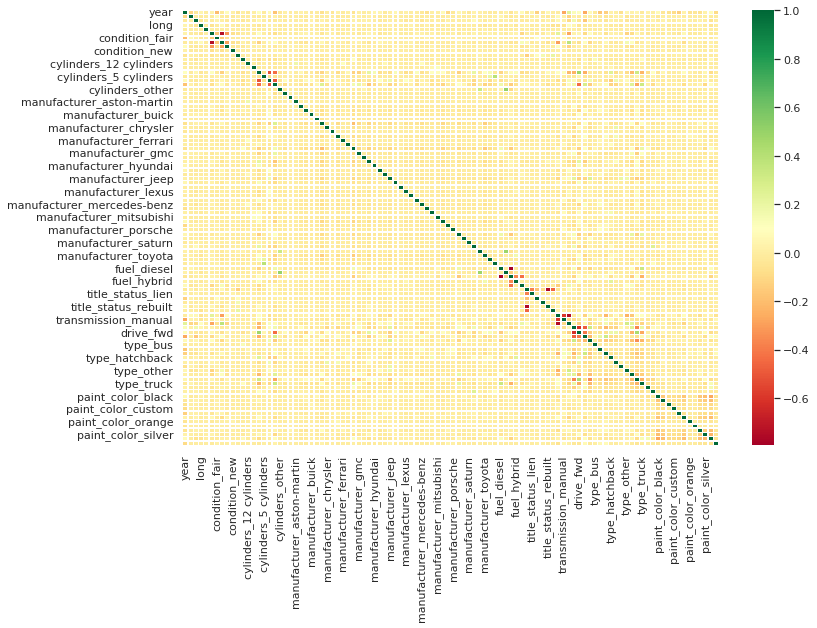

In [44]:
# Correlation plot
plt.figure(figsize = (12,8))
valid_df_corr = valid_df_encoded.corr()
sns.heatmap(valid_df_corr,fmt = "", cmap = "RdYlGn", linewidth = 0.30)
plt.show()

It seems features have less or no correlation between them.

Normalizing the validation data

In [45]:
## MinMax scaler
#scaler = MinMaxScaler()

valid_df_scaled = scaler.transform(valid_df_encoded.drop('price',axis=1))

valid_df_scaled

array([[0.86      , 0.0146    , 0.44411726, ..., 0.        , 1.        ,
        0.        ],
       [0.9       , 0.01009   , 0.44019147, ..., 0.        , 0.        ,
        0.        ],
       [0.96      , 0.0015813 , 0.44819537, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.92      , 0.0068873 , 0.37418337, ..., 0.        , 0.        ,
        0.        ],
       [0.92      , 0.0121716 , 0.30472529, ..., 1.        , 0.        ,
        0.        ],
       [0.96      , 0.0030635 , 0.40053907, ..., 0.        , 1.        ,
        0.        ]])

### Cleaning on the test dataset

In [46]:
test_df = X_test
test_df['price'] = y_test
test_df = test_df.reset_index(drop=True)
test_df.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,2011.0,hyundai,excellent,4 cylinders,gas,130786.0,clean,automatic,fwd,full-size,sedan,silver,41.800099,-81.078283,7500
1,2019.0,mini,good,NaN,gas,21246.0,clean,automatic,NaN,NaN,hatchback,NaN,42.780000,-71.080000,30590
2,2019.0,volkswagen,excellent,4 cylinders,gas,7952.0,clean,automatic,fwd,NaN,sedan,blue,61.217832,-149.870274,19995
3,2018.0,gmc,good,NaN,other,19458.0,clean,other,4wd,NaN,pickup,black,40.740000,-89.600000,35590
4,2017.0,ford,NaN,6 cylinders,gas,39556.0,rebuilt,automatic,4wd,NaN,truck,NaN,47.715888,-116.908034,462


In [47]:
test_df.shape

(170752, 15)

### Missing values

In [48]:
# check missing values are present or not
test_df.isna().sum()/len(test_df) * 100

year             0.293408
manufacturer     4.030407
condition       40.764383
cylinders       41.644607
fuel             0.723271
odometer         1.016679
title_status     1.933213
transmission     0.597943
drive           30.250305
size            71.594476
type            21.654798
paint_color     30.405500
lat              1.553715
long             1.553715
price            0.000000
dtype: float64

We can observed that missing values are present in the data. We are going to remove variables which having missingt values more than 70% of data.And also we would drop missing values in the dataset.



In [49]:
test_df = test_df.drop(['size'],axis=1)
test_df.shape

(170752, 14)

In [50]:
# Removing missing values
test_df = test_df.dropna()
test_df.shape

(46849, 14)

In [51]:
test_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46849 entries, 0 to 170750
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46849 non-null  float64
 1   manufacturer  46849 non-null  object 
 2   condition     46849 non-null  object 
 3   cylinders     46849 non-null  object 
 4   fuel          46849 non-null  object 
 5   odometer      46849 non-null  float64
 6   title_status  46849 non-null  object 
 7   transmission  46849 non-null  object 
 8   drive         46849 non-null  object 
 9   type          46849 non-null  object 
 10  paint_color   46849 non-null  object 
 11  lat           46849 non-null  float64
 12  long          46849 non-null  float64
 13  price         46849 non-null  int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 27.8 MB


In [52]:
test_df = test_df.reset_index(drop=True)
test_df.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,lat,long,price
0,2011.0,hyundai,excellent,4 cylinders,gas,130786.0,clean,automatic,fwd,sedan,silver,41.800099,-81.078283,7500
1,2019.0,volkswagen,excellent,4 cylinders,gas,7952.0,clean,automatic,fwd,sedan,blue,61.217832,-149.870274,19995
2,1997.0,chevrolet,fair,8 cylinders,gas,140500.0,clean,automatic,4wd,pickup,silver,41.538700,-75.946600,2750
3,2007.0,toyota,good,8 cylinders,gas,106454.0,clean,automatic,4wd,SUV,black,40.691380,-74.299975,12495
4,2014.0,gmc,excellent,6 cylinders,gas,114269.0,clean,automatic,4wd,truck,white,36.721370,-95.935180,0


### Encoding the test categorical variables

In [53]:
# Get dummy variables
test_df_encoded = pd.get_dummies(test_df,columns=['condition','cylinders','manufacturer','fuel','title_status','transmission','drive','type','paint_color'])
# reset index
test_df_encoded = test_df_encoded.reset_index(drop=True)
test_df_encoded.head()

,year,odometer,lat,long,price,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_10 cylinders,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,...,fuel_gas,fuel_hybrid,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,2011.0,130786.0,41.800099,-81.078283,7500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2019.0,7952.0,61.217832,-149.870274,19995,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1997.0,140500.0,41.538700,-75.946600,2750,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2007.0,106454.0,40.691380,-74.299975,12495,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2014.0,114269.0,36.721370,-95.935180,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [54]:
test_df_encoded.shape

(46849, 102)

In [55]:
test_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46849 entries, 0 to 46848
Columns: 102 entries, year to paint_color_yellow
dtypes: float64(4), int64(1), uint8(97)
memory usage: 6.1 MB


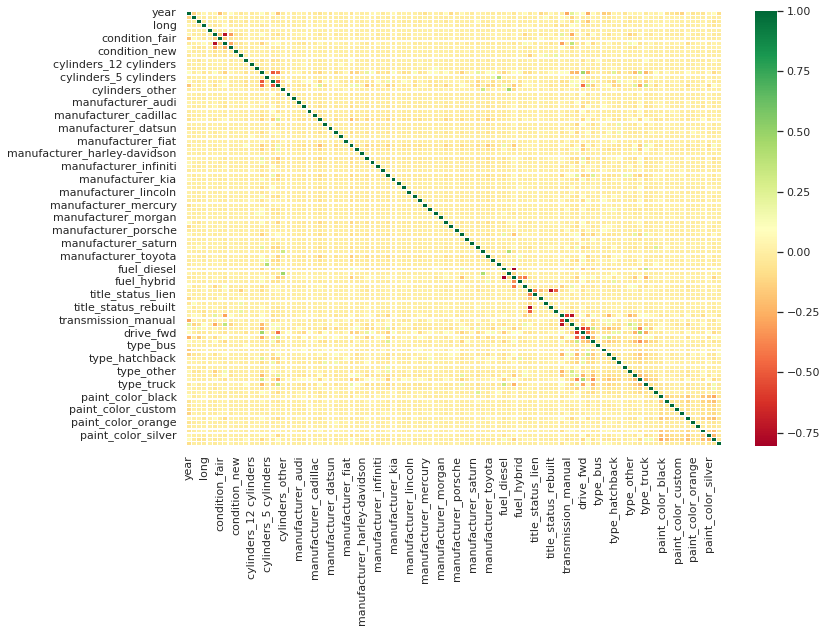

In [56]:
# Correlation plot
plt.figure(figsize = (12,8))
test_df_corr = test_df_encoded.corr()
sns.heatmap(test_df_corr,fmt = "", cmap = "RdYlGn", linewidth = 0.30)
plt.show()

It seems features have less or no correlation between them.

Normalization the test data

In [77]:
## MinMax scaler
#scaler = MinMaxScaler()

test_df_scaled = scaler.transform(test_df_encoded.drop('price',axis=1))

test_df_scaled

array([[8.90000000e-01, 1.30786000e-02, 4.62286614e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.70000000e-01, 7.95200000e-04, 7.20394676e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.50000000e-01, 1.40500000e-02, 4.58811997e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.20000000e-01, 1.10289000e-02, 4.31686219e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.90000000e-01, 1.93000000e-05, 3.82519719e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.60000000e-01, 2.74260000e-03, 3.94095343e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

### Building predictive models

### Linear Regression Model

In [78]:
X_train = train_df_scaled
y_train = train_df_encoded.price
X_valid = valid_df_scaled
y_valid = valid_df_encoded.price
## Linear regression model
lr = LinearRegression()

## fitting the model
lr.fit(X_train,y_train)

LinearRegression()

In [79]:
score = lr.score(X_valid,y_valid)
print(f'Accuracy for linear regression model is {score}')

Accuracy for linear regression model is -8.583646151816282e-05


### Lasso regularization model

In [80]:
## lasso model
lasso =Lasso(alpha=1.0)

lasso.fit(X_train,y_train)

Lasso()

In [81]:
score = lasso.score(X_valid,y_valid)
print(f'Accuracy for lasso model is {score}')

Accuracy for lasso model is -8.621239258443936e-05


### Ridge regularization model

In [82]:
## lasso model
ridge =Ridge(alpha=1.0)

ridge.fit(X_train,y_train)

Ridge()

In [83]:
score = ridge.score(X_valid,y_valid)
print(f'Accuracy for ridge model is {score}')

Accuracy for ridge model is -8.601082936410265e-05


### Polynomial features

In [64]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X_train)
X_poly_v = poly_features.fit_transform(X_valid)


In [65]:
lr_poly = lr.fit(X_poly,y_train)

In [66]:
score = lr_poly.score(X_poly_v,y_valid)
print(f'Accuracy for poly model is {score}')

Accuracy for poly model is -1.1351709651134652e+19


Comparing the linear regression, lasso, ridge and polynomial features, linear regression is performing well. So, we are going to use linear regression model to test on test dataset.

In [84]:
X_test = test_df_scaled
y_test = test_df_encoded.price

score = lr.score(X_test,y_test)
print(f'Accuracy for linear regression model is {score}')

Accuracy for linear regression model is -0.33493947362293186


Negative values of R2 may occur when fitting non linear data.